<a href="https://colab.research.google.com/github/YeongChaeYun7/OpenCV/blob/main/OpenCV%EC%98%81%EC%83%81%EC%B2%98%EB%A6%AC_03_%EC%98%81%EC%83%81%EC%9D%98_%EC%82%B0%EC%88%A0_%EB%B0%8F_%EB%85%BC%EB%A6%AC_%EC%97%B0%EC%82%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab.patches import cv2_imshow 
from google.colab import drive 
import cv2
import numpy as np
import matplotlib.pyplot as plt

영상처리에서 가장 기본적인 처리 단위는 픽셀.

픽셀I를 매핑함수f에 적용하면 픽셀O를 얻을 수 있음

O(x,y) = f[I(x,y)]

# Pixel Addition

동일한 크기의 영상 2개 더하기 -> 대응되는 좌표의 픽셀들을 더하여 출력

임의의 상수값 더하기 -> 하나의 입력 영상 전체에 동일하게 상수값 적용

주의할 점은 연산 결과가 255(픽셀 최댓값)을 넘으면 Overflow발생(260의 경우 5로 출력)

> Overflow 해결법

- Saturation

픽셀값이 설정된 최대값을 초과할 경우 미리 설정한 최대값(255) 출력

- Wrapping

픽셀값이 설정된 최대값을 초과할 경우 초과된 값에서 최대값+1 뺀 값 

- 최대 최소 정규화 방법 max-min normalization

입력된 픽셀을 미리 설정한 최대값과 최소값 사이값으로 재계산

픽셀 더하기 Saturation 적용

Mounted at /content/gdrive


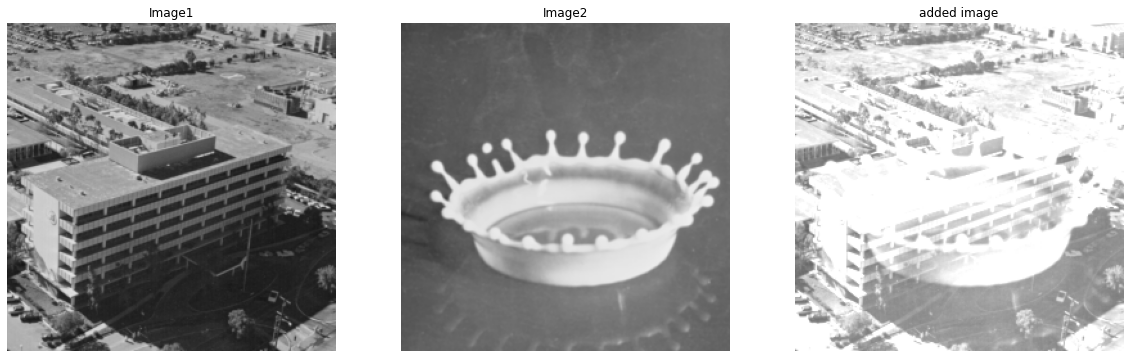

In [4]:
drive.mount('/content/gdrive') 
img1 = cv2.imread('/content/gdrive/My Drive/Image_Processing/aero2.bmp')
img2 = cv2.imread('/content/gdrive/My Drive/Image_Processing/milkdrop.bmp')
# BGR -> RGB
RGB_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB) 
RGB_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB) 
output_img = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB) 
# RGB 채널 나누기
R_img1,G_img1,B_img1=cv2.split(RGB_img1)
R_img2,G_img2,B_img2=cv2.split(RGB_img2)
# 출력 array 생성하고 0으로 초기화, unsigned byte (0~255)로 설정. 바탕만들기
R_plus=np.zeros((RGB_img1.shape[0],RGB_img1.shape[1]),dtype=np.ubyte)
G_plus=np.zeros((RGB_img1.shape[0],RGB_img1.shape[1]),dtype=np.ubyte)
B_plus=np.zeros((RGB_img1.shape[0],RGB_img1.shape[1]),dtype=np.ubyte)

#for문을 돌며 픽셀 더하기 연산
for h in range(RGB_img1.shape[0]):# H
  for w in range(RGB_img1.shape[1]):# W
    r = np.int32(R_img1[h,w]) + np.int32(R_img2[h,w]) # 타입 변환. Overflow에 대비해서 int32설정
    if (r>255): # 255 초과하면 255출력. Overflow방지 
      R_plus[h,w] = 255 # Saturation
    else:
      R_plus[h,w] = r # Saturation
    
    g = np.int32(G_img1[h,w]) + np.int32(G_img2[h,w]) # 타입 변환
    if (g>255): 
      G_plus[h,w] = 255 # Saturation
    else:
      G_plus[h,w] = g # Saturation

    b = np.int32(B_img1[h,w]) + np.int32(B_img2[h,w]) # 타입 변환
    if (b>255):
      B_plus[h,w] = 255 # Saturation
    else:
      B_plus[h,w] = b # Saturation 
   
# 출력
plt.figure(figsize=(20,20))

plt.subplot(1,3,1)
plt.title("Image1")
plt.imshow(RGB_img1)
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Image2")
plt.imshow(RGB_img2)
plt.axis("off")

plt.subplot(1,3,3)
output_img[:,:,0]=R_plus
output_img[:,:,1]=G_plus
output_img[:,:,2]=B_plus
plt.title("added image")
plt.imshow(output_img)
plt.axis("off")
plt.show()

픽셀 더하기 OpenCV 함수 사용

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


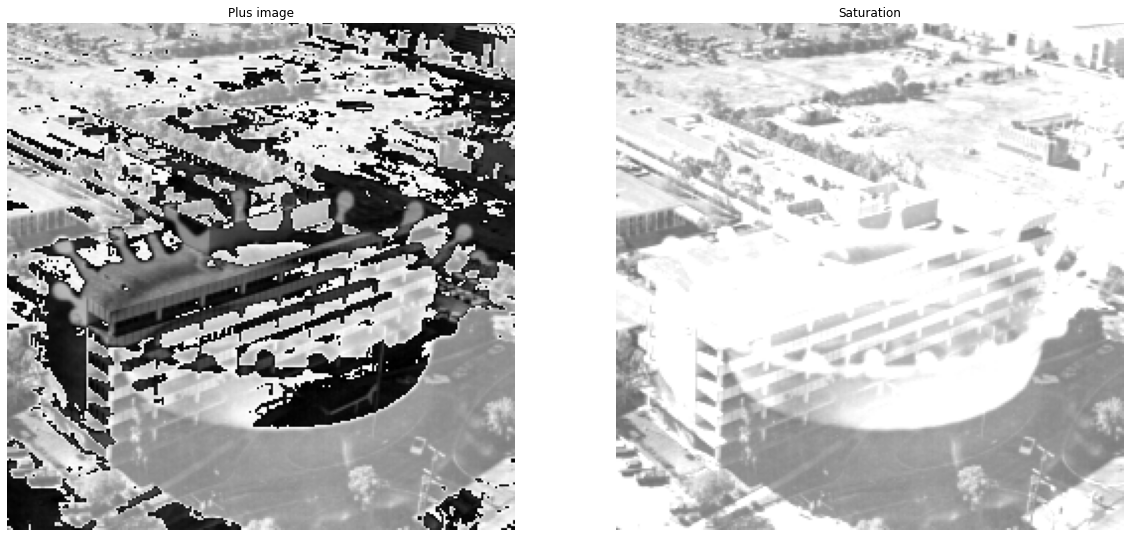

In [5]:
drive.mount('/content/gdrive') 
img1 = cv2.imread('/content/gdrive/My Drive/Image_Processing/aero2.bmp')
img2 = cv2.imread('/content/gdrive/My Drive/Image_Processing/milkdrop.bmp')

# 두 영상의 픽셀끼리 더하기 연산. Overflow처리가 안되서 이상한 값 출력
img_plus = img1+img2

# 더하기 연산과 Saturation기능 수행. Overflow처리 가능 
img_add=cv2.add(img1,img2)

# 출력
plt.figure(figsize=(20,20))

plt.subplot(1,2,1)
plt.title("Plus image")
plt.imshow(img_plus)
plt.axis("off")
 
plt.subplot(1,2,2)
plt.title("Saturation")
plt.imshow(img_add)
plt.axis("off")
plt.show()

픽셀 더하기 wrapping 적용

Mounted at /content/gdrive


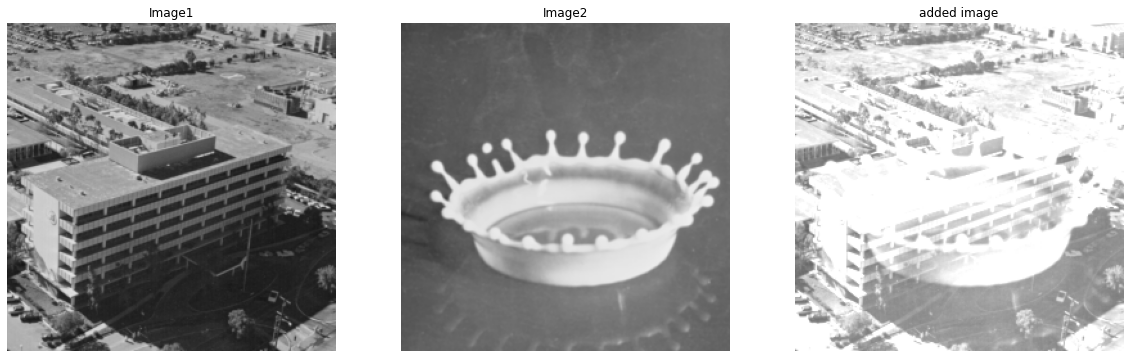

In [ ]:
drive.mount('/content/gdrive') 
img1 = cv2.imread('/content/gdrive/My Drive/Image_Processing/aero2.bmp')
img2 = cv2.imread('/content/gdrive/My Drive/Image_Processing/milkdrop.bmp')
 
RGB_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB) 
RGB_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB) 
output_img = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB) 

R_img1,G_img1,B_img1=cv2.split(RGB_img1)
R_img2,G_img2,B_img2=cv2.split(RGB_img2)

R_plus=np.zeros((RGB_img1.shape[0],RGB_img1.shape[1]),dtype=np.ubyte)
G_plus=np.zeros((RGB_img1.shape[0],RGB_img1.shape[1]),dtype=np.ubyte)
B_plus=np.zeros((RGB_img1.shape[0],RGB_img1.shape[1]),dtype=np.ubyte)

for h in range(RGB_img1.shape[0]):
  for w in range(RGB_img1.shape[1]):
    r = np.int32(R_img1[h,w]) + np.int32(R_img2[h,w]) 
    if (r>255): # wrapping
      R_plus[h,w] = r - (255+1)
    else:
      R_plus[h,w] = r 
    
    g = np.int32(G_img1[h,w]) + np.int32(G_img2[h,w])
    if (g>255): 
      G_plus[h,w] = g - (255+1)
    else:
      G_plus[h,w] = g 

    b = np.int32(B_img1[h,w]) + np.int32(B_img2[h,w]) 
    if (b>255):
      B_plus[h,w] = b- (255+1)
    else:
      B_plus[h,w] = b 
   
plt.figure(figsize=(20,20))

plt.subplot(1,3,1)
plt.title("Image1")
plt.imshow(RGB_img1)
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Image2")
plt.imshow(RGB_img2)
plt.axis("off")

plt.subplot(1,3,3)
output_img[:,:,0]=R_plus
output_img[:,:,1]=G_plus
output_img[:,:,2]=B_plus
plt.title("added image")
plt.imshow(output_img)
plt.axis("off")
plt.show()

픽셀 더하기 max-min normalization 적용

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in double_scalars


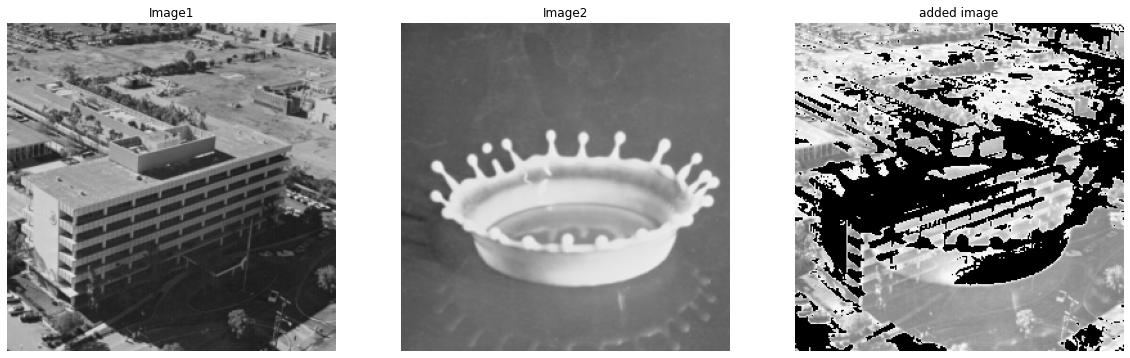

In [6]:
drive.mount('/content/gdrive') 
img1 = cv2.imread('/content/gdrive/My Drive/Image_Processing/aero2.bmp')
img2 = cv2.imread('/content/gdrive/My Drive/Image_Processing/milkdrop.bmp')
 
RGB_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB) 
RGB_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB) 
output_img = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB) 

R_img1,G_img1,B_img1=cv2.split(RGB_img1)
R_img2,G_img2,B_img2=cv2.split(RGB_img2)

R_plus=np.zeros((RGB_img1.shape[0],RGB_img1.shape[1]),dtype=np.ubyte)
G_plus=np.zeros((RGB_img1.shape[0],RGB_img1.shape[1]),dtype=np.ubyte)
B_plus=np.zeros((RGB_img1.shape[0],RGB_img1.shape[1]),dtype=np.ubyte)

min = 0.0
max = 0.0

for h in range(RGB_img1.shape[0]):
  for w in range(RGB_img1.shape[1]):
    r = np.int32(R_img1[h,w]) + np.int32(R_img2[h,w]) 
    if (r>255): #  max-min normalization
      R_plus[h,w] = (r-min) / (max-min) * max
    else:
      R_plus[h,w] = r 
    
    g = np.int32(G_img1[h,w]) + np.int32(G_img2[h,w])
    if (g>255): 
      G_plus[h,w] = (g-min) / (max-min) * max
    else:
      G_plus[h,w] = g 

    b = np.int32(B_img1[h,w]) + np.int32(B_img2[h,w]) 
    if (b>255):
      B_plus[h,w] = (b-min) / (max-min) * max
    else:
      B_plus[h,w] = b 
   
plt.figure(figsize=(20,20))

plt.subplot(1,3,1)
plt.title("Image1")
plt.imshow(RGB_img1)
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Image2")
plt.imshow(RGB_img2)
plt.axis("off")

plt.subplot(1,3,3)
output_img[:,:,0]=R_plus
output_img[:,:,1]=G_plus
output_img[:,:,2]=B_plus
plt.title("added image")
plt.imshow(output_img)
plt.axis("off")
plt.show()

# Pixel Subtraction

더하기 연산과 마찬가지로 대응되는 좌표의 각 픽셀들을 빼서 출력

결과값이 음수가 될 수 있으므로 이를 방지하기 위해 절대값으로 출력하기도 함

하나의 영상에서 임의의 상수값을 뺄 수도 있음


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


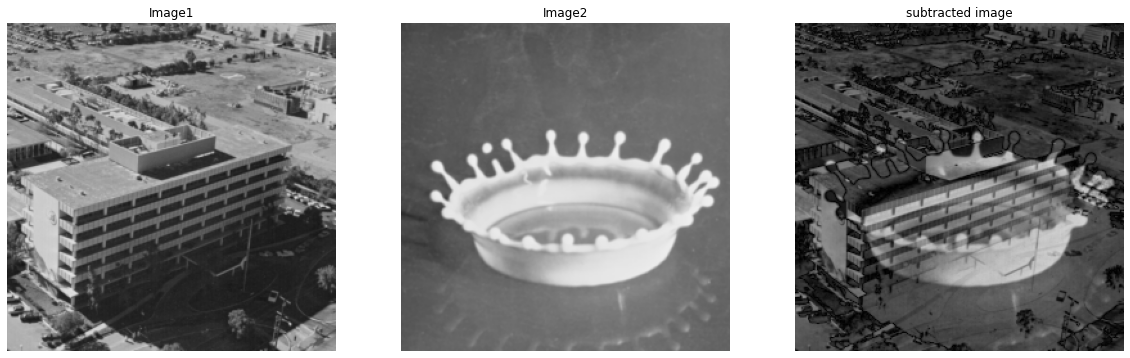

In [8]:
drive.mount('/content/gdrive') 
img1 = cv2.imread('/content/gdrive/My Drive/Image_Processing/aero2.bmp')
img2 = cv2.imread('/content/gdrive/My Drive/Image_Processing/milkdrop.bmp')

RGB_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB) 
RGB_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB) 
output_img = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB) 

R_img1,G_img1,B_img1=cv2.split(RGB_img1)
R_img2,G_img2,B_img2=cv2.split(RGB_img2)

R_plus=np.zeros((RGB_img1.shape[0],RGB_img1.shape[1]),dtype=np.ubyte)
G_plus=np.zeros((RGB_img1.shape[0],RGB_img1.shape[1]),dtype=np.ubyte)
B_plus=np.zeros((RGB_img1.shape[0],RGB_img1.shape[1]),dtype=np.ubyte)

for h in range(RGB_img1.shape[0]):
  for w in range(RGB_img1.shape[1]):
    R_plus[h,w] = np.abs(np.int32(R_img1[h,w]) - np.int32(R_img2[h,w])) # 각 픽셀의 차이값을 빼고 절대값을 취하여 출력 배열에 넣음
    G_plus[h,w] = np.abs(np.int32(G_img1[h,w]) - np.int32(G_img2[h,w])) 
    B_plus[h,w] = np.abs(np.int32(B_img1[h,w]) - np.int32(B_img2[h,w])) 
   
plt.figure(figsize=(20,20))

plt.subplot(1,3,1)
plt.title("Image1")
plt.imshow(RGB_img1)
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Image2")
plt.imshow(RGB_img2)
plt.axis("off")

plt.subplot(1,3,3)
output_img[:,:,0]=R_plus
output_img[:,:,1]=G_plus
output_img[:,:,2]=B_plus
plt.title("subtracted image")
plt.imshow(output_img)
plt.axis("off")
plt.show()

픽셀 빼기 OpenCV 함수 사용

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


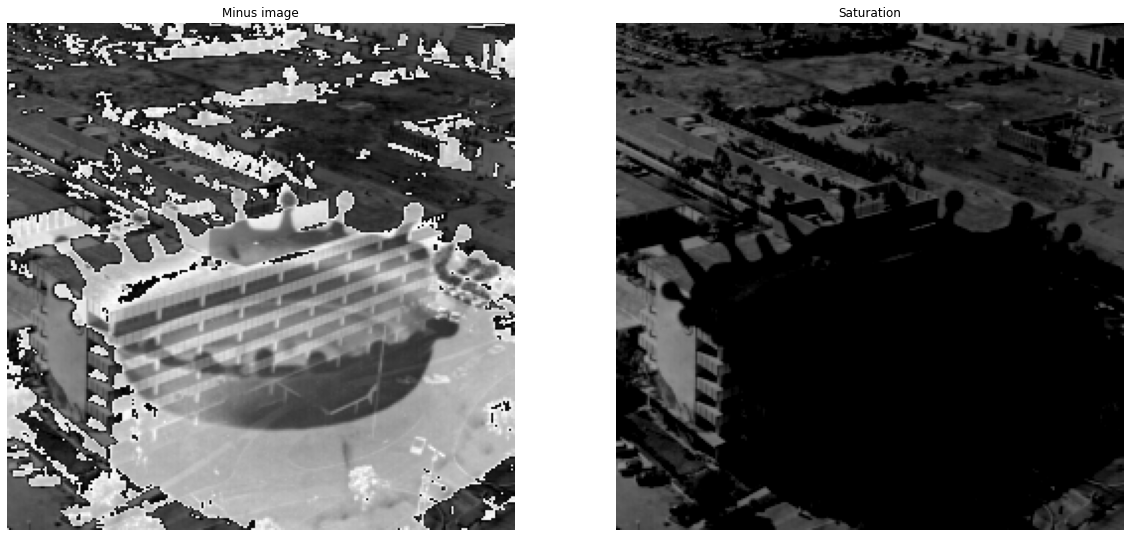

In [11]:
drive.mount('/content/gdrive') 
img1 = cv2.imread('/content/gdrive/My Drive/Image_Processing/aero2.bmp')
img2 = cv2.imread('/content/gdrive/My Drive/Image_Processing/milkdrop.bmp')

# 두 영상의 픽셀끼리 빼기 연산. Overflow처리가 안되서 이상한 값 출력
img_plus = img1-img2

# 빼기 연산과 Saturation기능 수행. Overflow처리 가능 
img_add=cv2.subtract(img1,img2)

plt.figure(figsize=(20,20))

plt.subplot(1,2,1)
plt.title("Minus image")
plt.imshow(img_plus)
plt.axis("off")
 
plt.subplot(1,2,2)
plt.title("Saturation")
plt.imshow(img_add)
plt.axis("off")
plt.show()

# Pixel Multiplication 

픽셀의 곱은 동일 크기의 두 영상에서 대응되는 좌표의 픽셀곱 연산이다

하나의 영상에 임의의 상수를 곱할 수도 있다

이때 상수값이 1보다 작은 부동소수점일 경우, 밝기(intensity)가 떨어져서 출력될 수 있음

컬러영상에선 R,G,B 채널별로 상수값을 다르게하여 출력 영상의 색상조정이 가능하다

픽셀 곱셈에서 Overflow는 픽셀 덧셈연산과 같은 해결법 사용

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


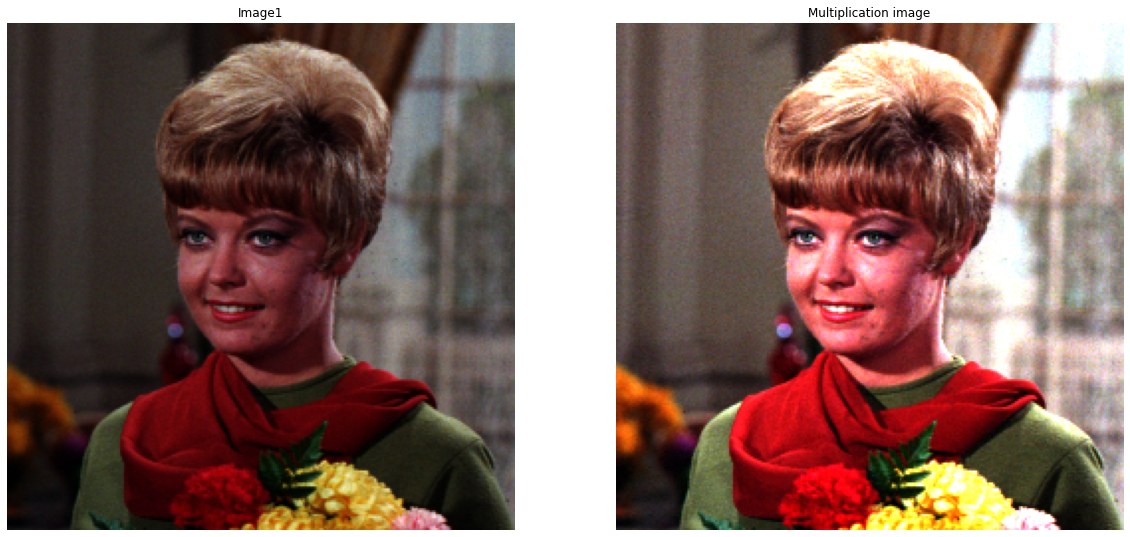

In [15]:
drive.mount('/content/gdrive') 
img1 = cv2.imread('/content/gdrive/My Drive/Image_Processing/girl.jpg')

RGB_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB) 
output_img = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB) 

R_img1,G_img1,B_img1=cv2.split(RGB_img1)

R_plus=np.zeros((RGB_img1.shape[0],RGB_img1.shape[1]),dtype=np.ubyte)
G_plus=np.zeros((RGB_img1.shape[0],RGB_img1.shape[1]),dtype=np.ubyte)
B_plus=np.zeros((RGB_img1.shape[0],RGB_img1.shape[1]),dtype=np.ubyte)

C=2.0  #곱하기 상수값

def saturation(value): # saturation 함수 정의
    if(value>255):
       value = 255;
    return value 

for h in range(RGB_img1.shape[0]):
  for w in range(RGB_img1.shape[1]):
    R_plus[h,w] = saturation(np.int32(R_img1[h,w])*C) # C를 원본에 곱하고 픽셀값 정규화
    G_plus[h,w] = saturation(np.int32(G_img1[h,w])*C) 
    B_plus[h,w] = saturation(np.int32(B_img1[h,w])*C) 

# 출력
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.title("Image1")
plt.imshow(RGB_img1)
plt.axis("off")

plt.subplot(1,2,2)
output_img[:,:,0]=R_plus
output_img[:,:,1]=G_plus
output_img[:,:,2]=B_plus
plt.title("Multiplication image")
plt.imshow(output_img)
plt.axis("off")
plt.show()

# Pixel Division

픽셀의 나누기는 동일 크기의 두 영상에서 대응되는 좌표의 픽셀을 나누는 방식이다

하나의 영상에 임의의 상수를 나눌 수도 있다

연산된 값이 부동소수점일 경우, 출력영상에선 정수형이 입력되어야하므로

소수점이하를 버리거나 반올림 처리함

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


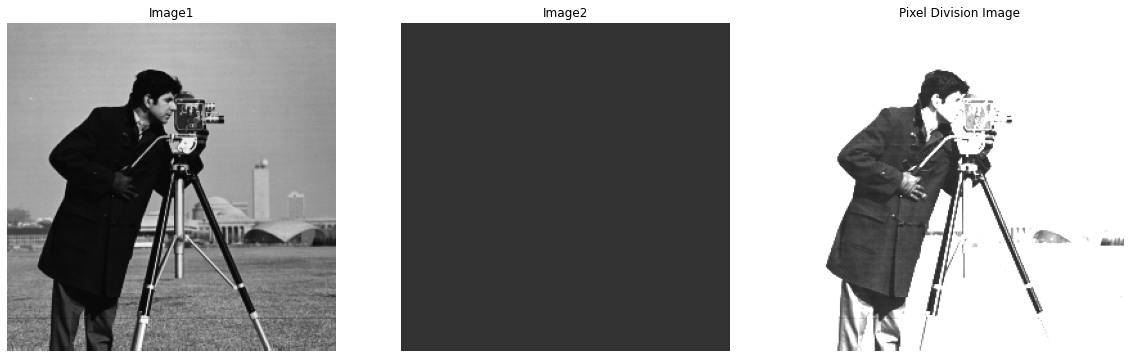

In [16]:
drive.mount('/content/gdrive') 

img1 = cv2.imread('/content/gdrive/My Drive/Image_Processing/camera.bmp')
img2 = cv2.imread('/content/gdrive/My Drive/Image_Processing/background.bmp')

RGB_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB) 
RGB_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
output_img = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB) 

R_img1,G_img1,B_img1=cv2.split(RGB_img1)
R_img2,G_img2,B_img2=cv2.split(RGB_img2)

R_plus=np.zeros((RGB_img1.shape[0],RGB_img1.shape[1]),dtype=np.ubyte)
G_plus=np.zeros((RGB_img1.shape[0],RGB_img1.shape[1]),dtype=np.ubyte)
B_plus=np.zeros((RGB_img1.shape[0],RGB_img1.shape[1]),dtype=np.ubyte)

def saturation(value): #saturation함수 정의
    if(value>255):
       value = 255;
    return value 
#for문을 돌며 픽셀 나누기 연산 하기
for h in range(RGB_img1.shape[0]):
  for w in range(RGB_img1.shape[1]):
    R_plus[h,w] = saturation(np.fabs(np.float32(R_img1[h,w])/ np.float32(R_img2[h,w]+1))*255.0) # 나누기여서 np.float32 변환
    G_plus[h,w] = saturation(np.fabs(np.float32(G_img1[h,w])/ np.float32(G_img2[h,w]+1))*255.0) # 실수형 연산이라 절대값을 np.fabs 변환
    B_plus[h,w] = saturation(np.fabs(np.float32(B_img1[h,w])/ np.float32(B_img2[h,w]+1))*255.0) # +1은 분모 영상의 픽셀이 0인 경우의 오류 방지를 위해서
   
plt.figure(figsize=(20,20))

plt.subplot(1,3,1)
plt.title("Image1")
plt.imshow(RGB_img1)
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Image2")
plt.imshow(RGB_img2)
plt.axis("off")

plt.subplot(1,3,3)
output_img[:,:,0]=R_plus
output_img[:,:,1]=G_plus
output_img[:,:,2]=B_plus
plt.title("Pixel Division Image")
plt.imshow(output_img)
plt.axis("off")
plt.show()